In [ ]:
import numpy as np #numerical operation
import matplotlib.pyplot as plt #data visualisation is there

import torch
import torch.nn #neural network
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [ ]:
!pip install --upgrade torchvision

import torchvision
from torchvision.utils import make_grid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinu

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path_test= "/content/drive/MyDrive/Xray dataset/test"
data_path_train="/content/drive/MyDrive/Xray dataset/train"

In [ ]:
img_size = 120
img_transform = transforms.Compose ([
                                      transforms.Resize((img_size,img_size)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),#pixel into tensor
                                      transforms.Normalize(mean = [0.485,0.456,0.475],#normalising Pixel of all model the mean
                                                           std = [0.299,0.224,0.225])#x-mena/std

])

In [ ]:
train_data = ImageFolder(root = data_path_train , transform=img_transform)
test_data = ImageFolder(root = data_path_test , transform=img_transform)

In [ ]:
len(train_data) , len(test_data)

(251, 66)

In [ ]:
train_data.class_to_idx

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
val_data , test_data = random_split(test_data,[50,16])

In [ ]:
len(val_data) ,  len(test_data)

(50, 16)

In [ ]:
train_loader = DataLoader(train_data , batch_size=16 , shuffle=True)
val_loader = DataLoader(val_data,batch_size=16,shuffle=True)

In [ ]:
for img,label in train_loader: #[batch size is N , C is chaneel and height ,H and ,W is width ]
  print(img.shape)
  break

torch.Size([16, 3, 120, 120])


In [ ]:
def show_img(data):
    for img, label in data:
        plt.figure(figsize=(12, 6))
        # If you want to display 6 images per row, you can adjust the grid size manually
        grid = make_grid(img, nrow=5).permute(1, 2, 0)
        plt.imshow(grid)
        plt.show()
        break

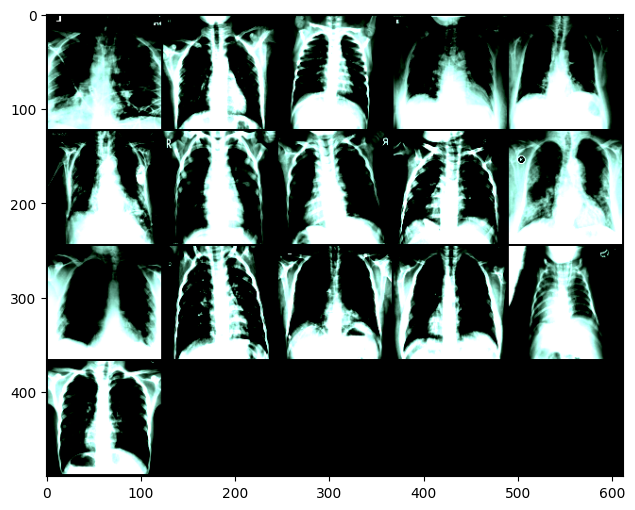

In [ ]:
show_img(train_loader)

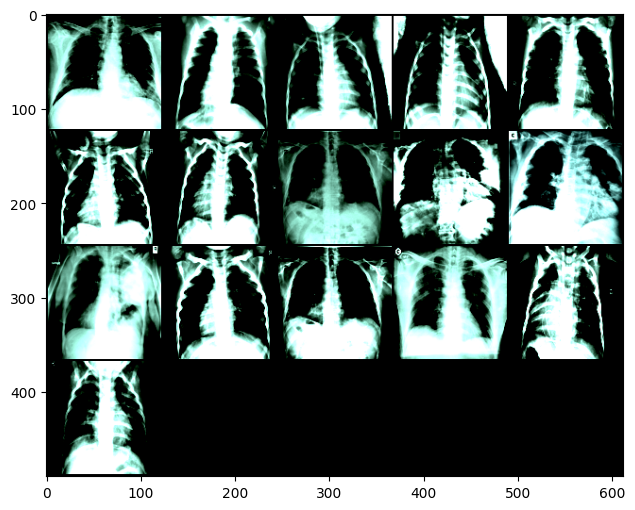

In [ ]:
show_img(val_loader)

In [ ]:
import torch
import torch.nn as nn

class ANN(nn.Module):
    def __init__(self, hidden_layer=64):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(120 * 120 * 3, hidden_layer)
        self.fc2 = nn.Linear(hidden_layer, 3)
        self.relu = nn.ReLU()

    def forward(self, img):
        # [N, C, W, H]
        out = img.view(-1, 120 * 120 * 3)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [ ]:
model = ANN()
print(model.parameters)

<bound method Module.parameters of ANN(
  (fc1): Linear(in_features=43200, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=3, bias=True)
  (relu): ReLU()
)>


In [ ]:
# prompt: loss_fn = nn.CrossEntropyloss()

loss_fn = nn.CrossEntropyLoss()
optimizer =  optim.SGD(model.parameters(), lr =0.001)

Epoch 1, Training Acc 0.82, Training Loss 0.51, Validation Acc 0.78, Validation Loss 0.52
Epoch 2, Training Acc 0.89, Training Loss 0.36, Validation Acc 0.78, Validation Loss 0.34
Epoch 3, Training Acc 0.88, Training Loss 0.31, Validation Acc 0.84, Validation Loss 0.33
Epoch 4, Training Acc 0.90, Training Loss 0.27, Validation Acc 0.78, Validation Loss 0.39
Epoch 5, Training Acc 0.94, Training Loss 0.22, Validation Acc 0.84, Validation Loss 0.30
Epoch 6, Training Acc 0.92, Training Loss 0.21, Validation Acc 0.74, Validation Loss 0.42
Epoch 7, Training Acc 0.94, Training Loss 0.19, Validation Acc 0.90, Validation Loss 0.22
Epoch 8, Training Acc 0.94, Training Loss 0.19, Validation Acc 0.86, Validation Loss 0.26
Epoch 9, Training Acc 0.95, Training Loss 0.16, Validation Acc 0.88, Validation Loss 0.56
Epoch 10, Training Acc 0.94, Training Loss 0.16, Validation Acc 0.88, Validation Loss 0.53


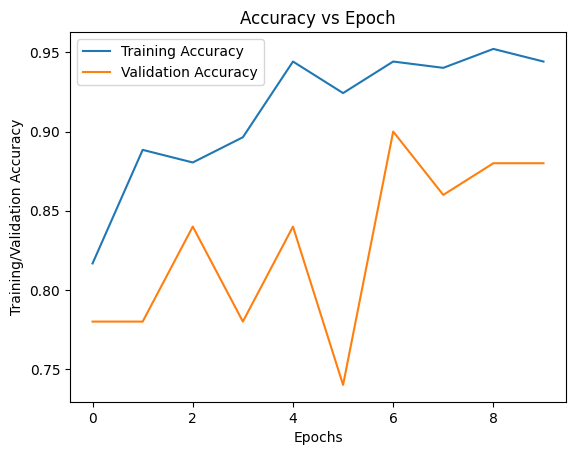

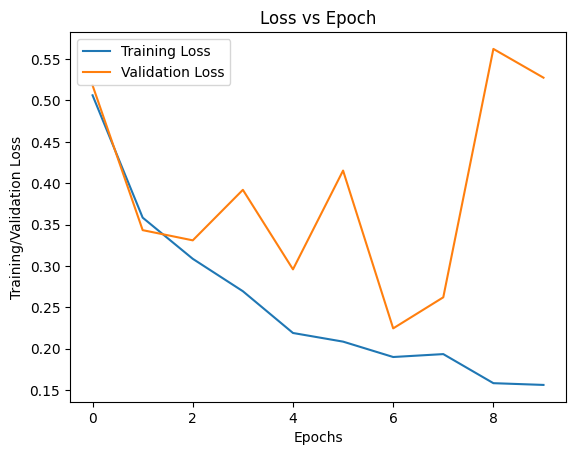

In [ ]:
# Define the number of epochs
epochs = 10  # You can set this to any number of epochs you want

# Initialize lists to store training and validation metrics
training_acc = []
training_loss = []
validation_acc = []
validation_loss = []

# Training loop
for epoch in range(epochs):
    train_loss = 0.0
    train_acc = 0.0

    model.train()

    for images, labels in train_loader:
        optimizer.zero_grad()  # reset the gradient

        output = model(images)
        loss = loss_fn(output, labels)

        loss.backward()  # calculate the gradient
        optimizer.step()  # Wn = Wo - lr * grad

        predictions = torch.argmax(output, 1)
        train_acc += (predictions == labels).sum().item()
        train_loss += loss.item()

    training_acc.append(train_acc / len(train_data))
    training_loss.append(train_loss / len(train_loader))

    val_loss = 0.0
    val_acc = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            output = model(images)
            loss = loss_fn(output, labels)

            predictions = torch.argmax(output, 1)
            val_acc += (predictions == labels).sum().item()
            val_loss += loss.item()

        validation_loss.append(val_loss / len(val_loader))
        validation_acc.append(val_acc / len(val_data))

    print("Epoch {}, Training Acc {:.2f}, Training Loss {:.2f}, Validation Acc {:.2f}, Validation Loss {:.2f}".format(
        epoch + 1, train_acc / len(train_data), train_loss / len(train_loader), val_acc / len(val_data), val_loss / len(val_loader)
    ))

# Plotting the results
plt.title("Accuracy vs Epoch")
plt.plot(range(epochs), training_acc, label="Training Accuracy")
plt.plot(range(epochs), validation_acc, label="Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Training/Validation Accuracy")
plt.show()

plt.title("Loss vs Epoch")
plt.plot(range(epochs), training_loss, label="Training Loss")
plt.plot(range(epochs), validation_loss, label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Training/Validation Loss")
plt.show()


In [ ]:
train(model,loss_fn , optimizer)

In [ ]:
def predict_img(img,model):
  x = img.unsqueeze(0)
  y = model(x)

  pred = torch.argmax(y,dim=1)

  return train_data.classes[pred]


In [ ]:
train_data.classes

['Covid', 'Normal', 'Viral Pneumonia']

Actual Label : Normal Predicted Label : Normal


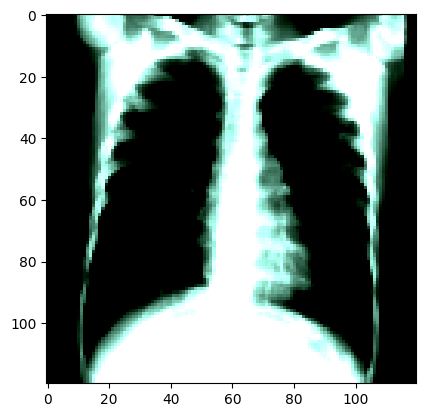

In [ ]:
img , label = test_data[15]
plt.imshow(img.permute(1,2,0))
print("Actual Label :", train_data.classes[label] , "Predicted Label :", predict_img(img,model))